In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
train_data= pd.read_csv("train_titanic.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_num= train_data.copy()
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_data.shape 

(891, 12)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

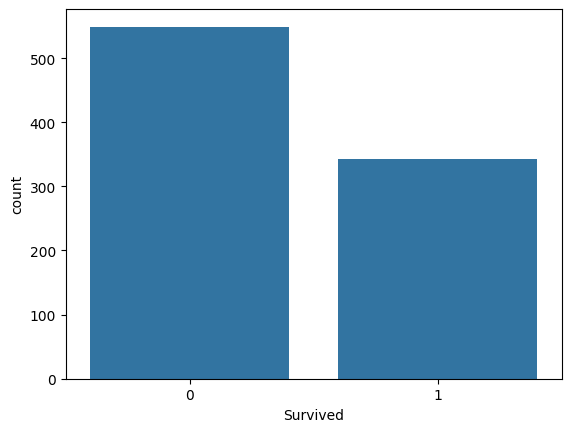

In [8]:
sns.countplot(x='Survived',data=train_data)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

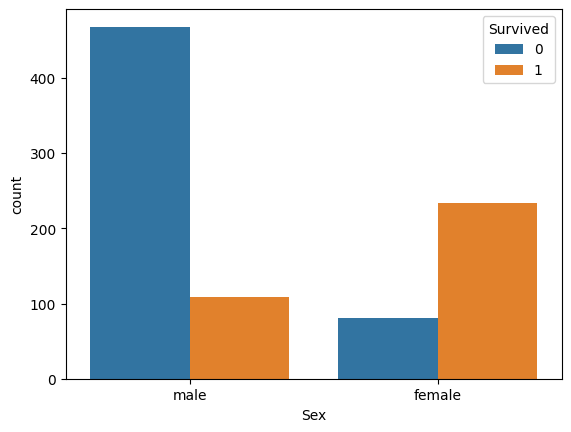

In [9]:
train_data.groupby(['Sex','Survived'])['Survived'].count()
sns.countplot(x='Sex',hue='Survived',data=train_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

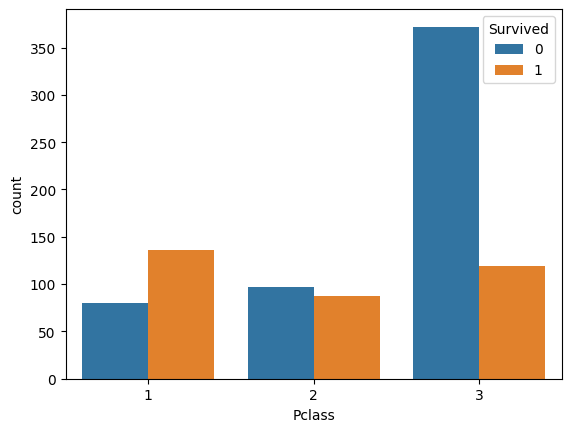

In [10]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)
plt.show


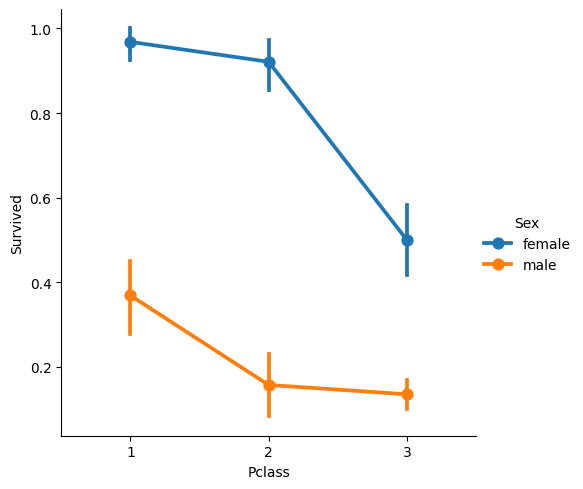

In [11]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=train_data,kind='point')
plt.show()


In [12]:
print('Oldest person Survived was of:',train_data[train_data['Survived']==1]['Age'].max())
print('Youngest person Survived was of:',train_data[train_data['Survived']==1]['Age'].min())
print('Average person Survived was of:',train_data[train_data['Survived']==1]['Age'].mean())
train_data['Intial']=0
for i in train_data:
  train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.')
train_data

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 28.343689655172415


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Intial,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr


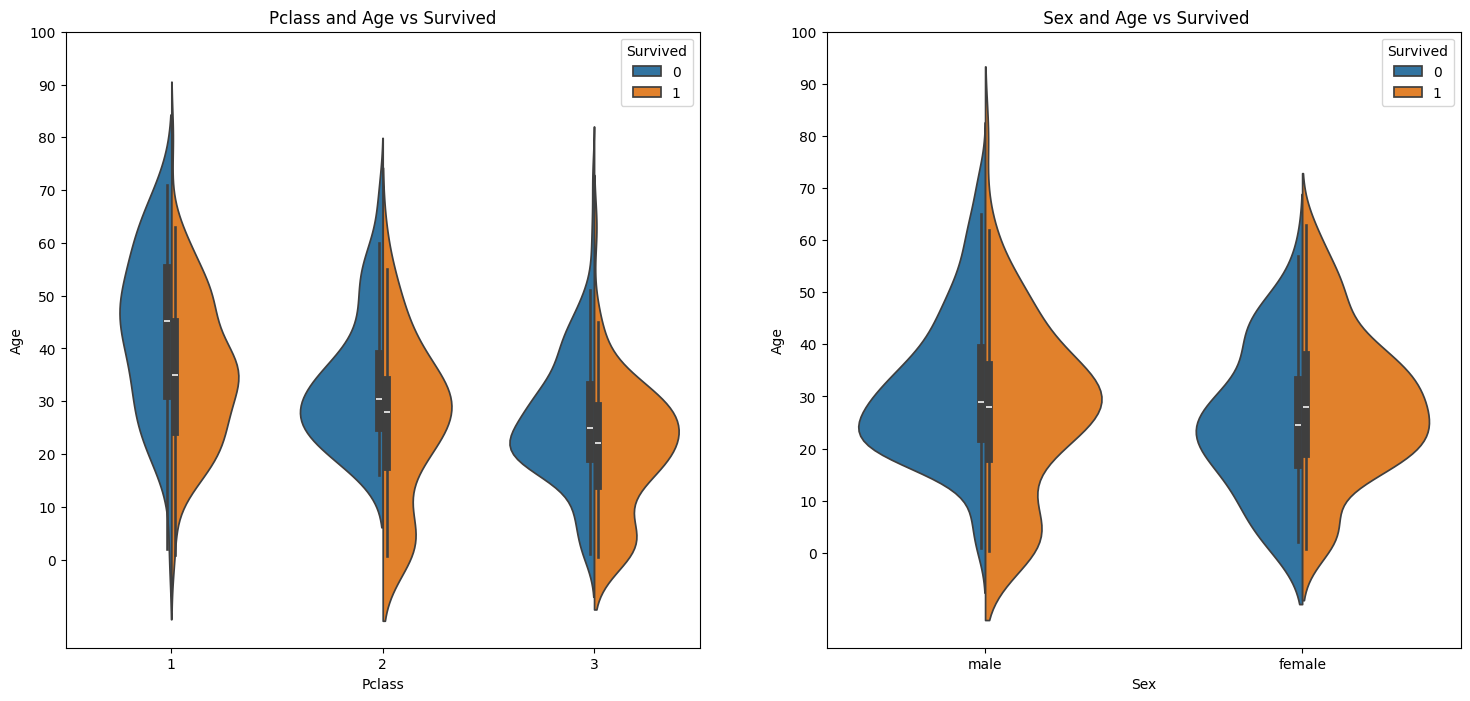

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train_data,split=True,ax=ax[1])
ax[1].set_title(' Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
pd.crosstab([train_data.Initial,train_data.Sex],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
[train_data.groupby('Initial')['Age'].mean()]
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46
train_data.Age.isnull().any()

False

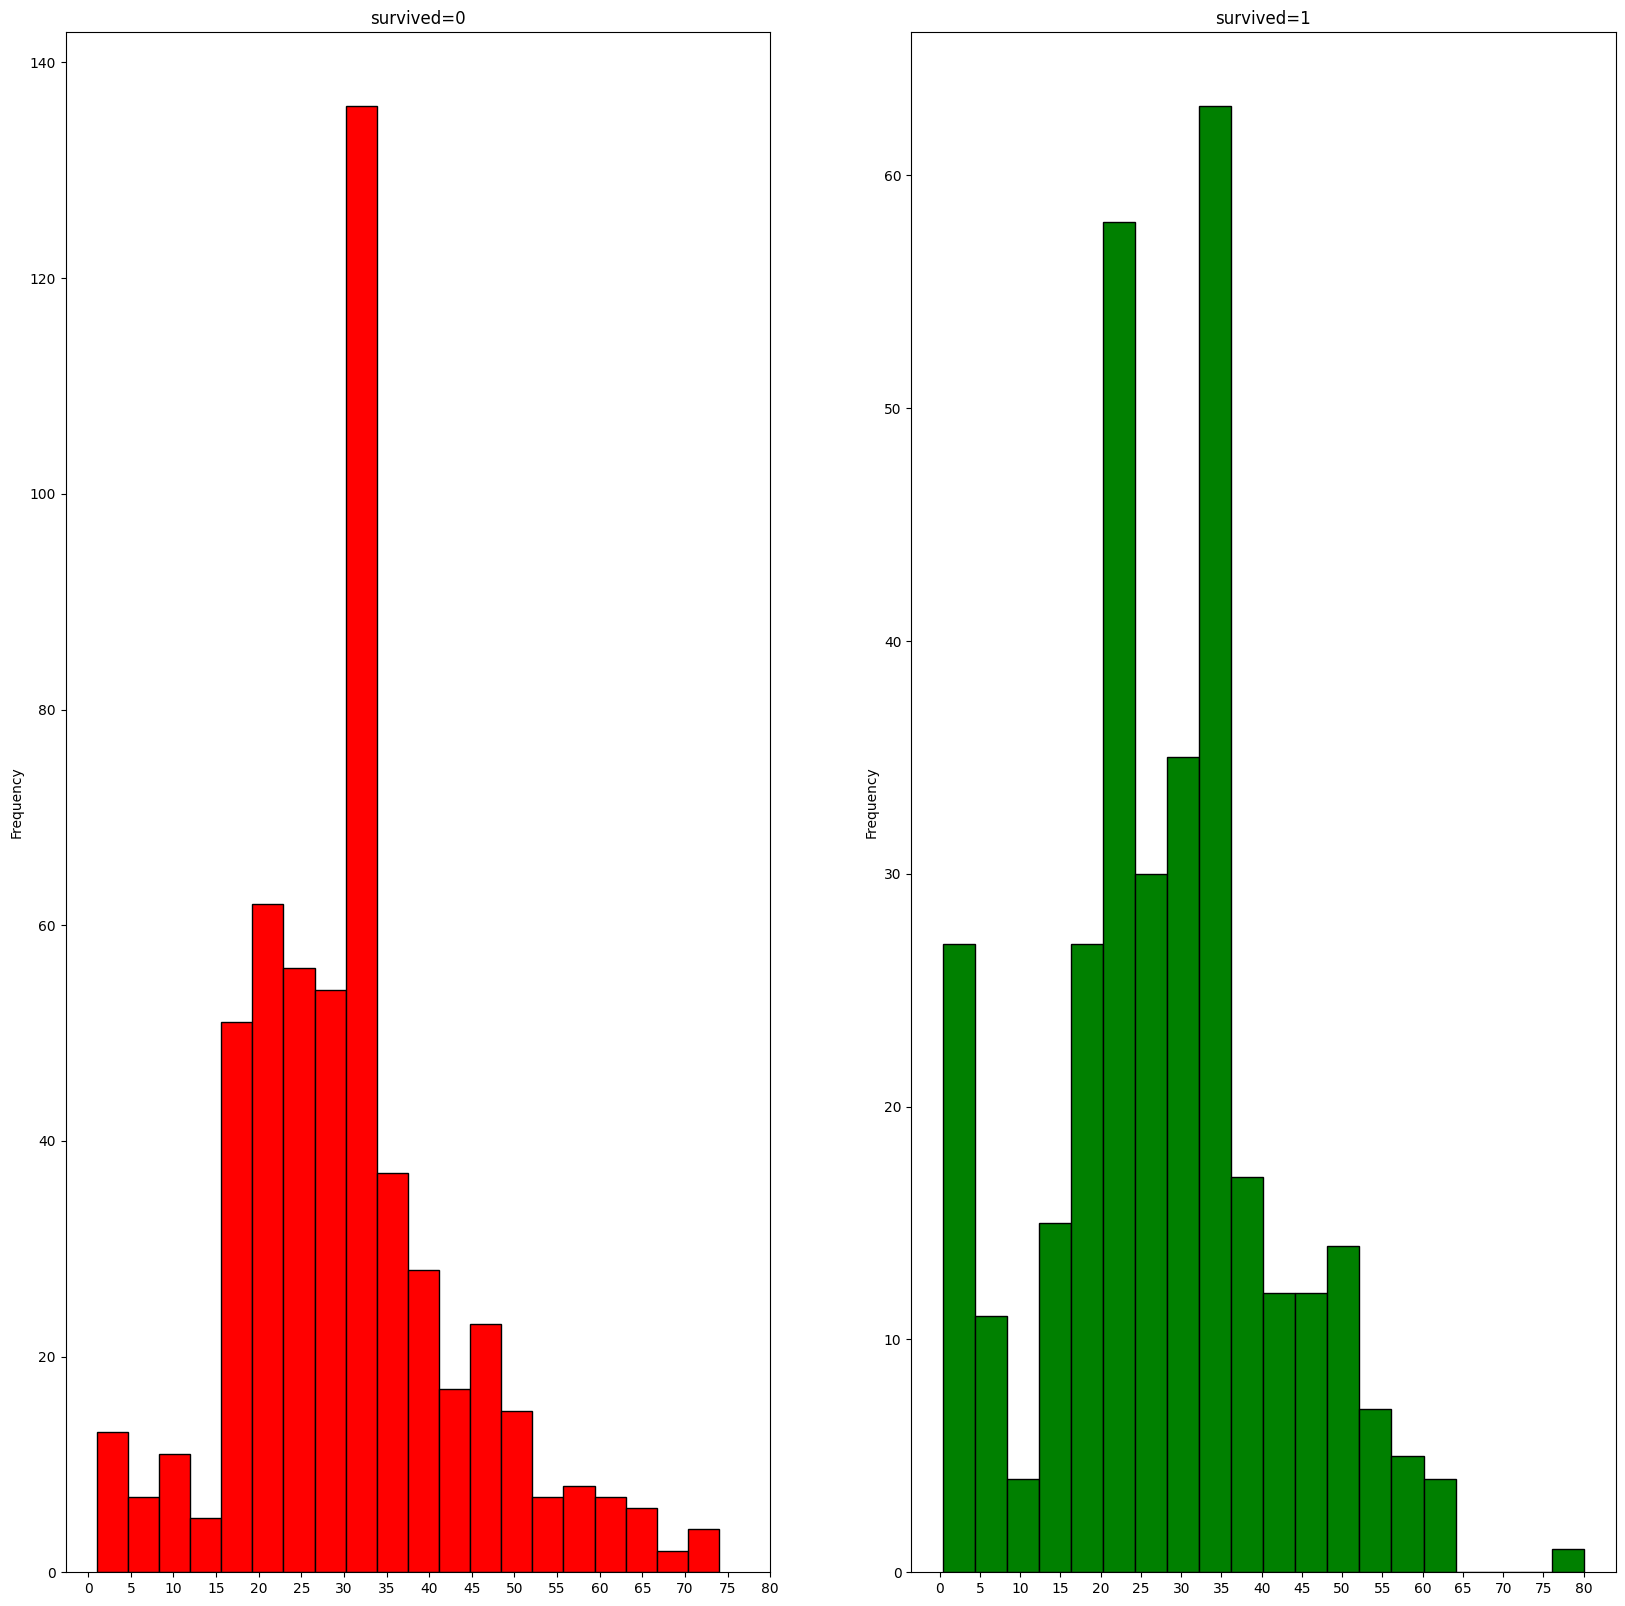

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('survived=1')
plt.show()

In [16]:
import random

dataset=train_data[(np.abs(stats.zscore(train_data['Age']))<3)]

survived_1=dataset[dataset['Survived']==1]['Age']
survived_0=dataset[dataset['Survived']==0]['Age']

survived_0=survived_0.values.tolist()
survived_0=random.sample(survived_0, 100)
survived_1=survived_1.values.tolist()
survived_1=random.sample(survived_1, 100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(survived_1,survived_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

if pval<=0.05:
    print('we reject null hypothesis hence dependent or have relation')
else:
    print('we accept null hypothesis hence independent')

ttest -1.814305354163875
p value 0.07116631814892779
we accept null hypothesis hence independent


<Figure size 0x10000 with 0 Axes>

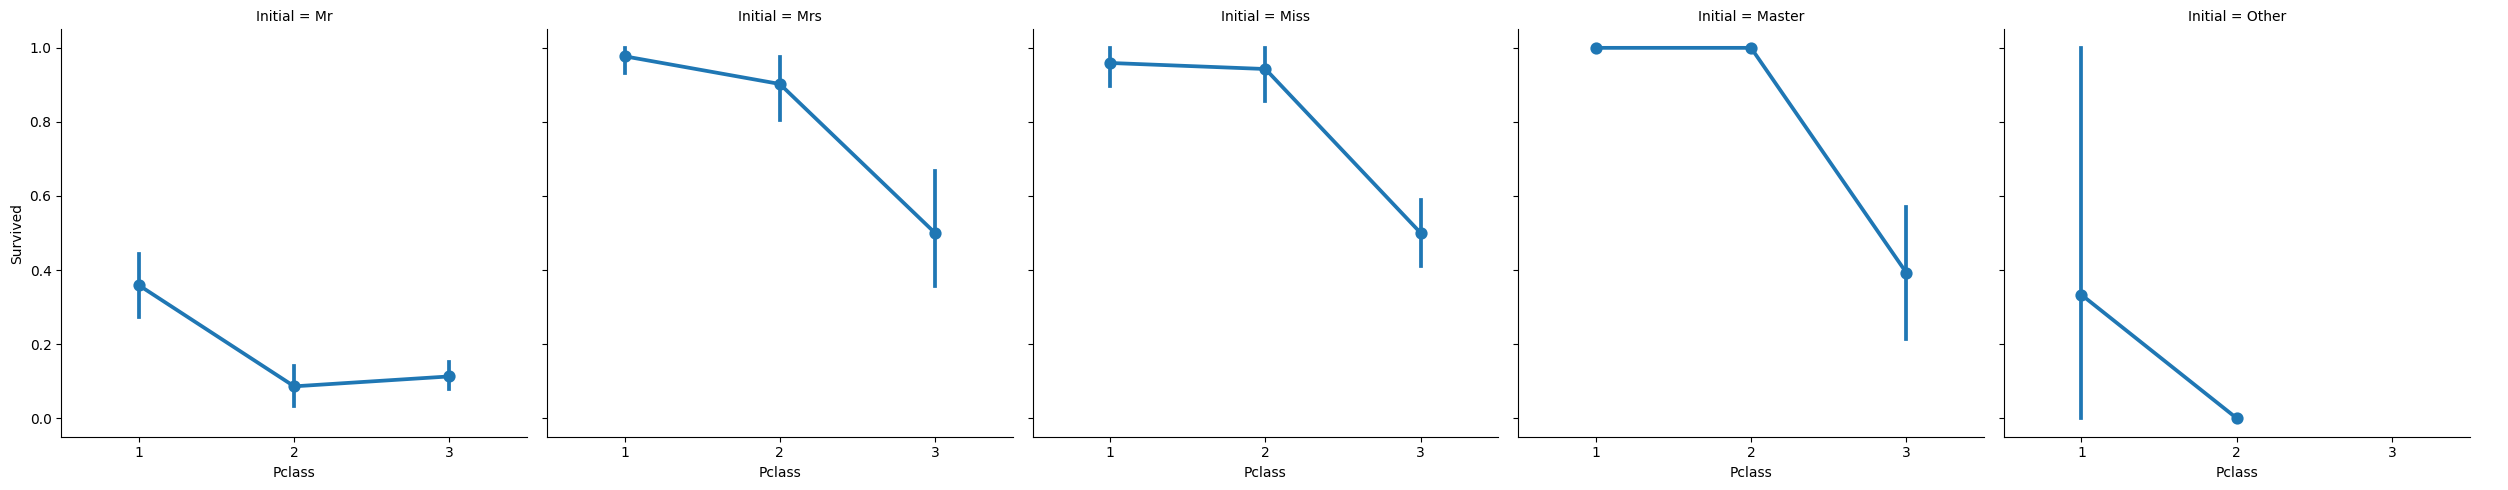

In [17]:
plt.figure(figsize=(0,100))
sns.catplot(x='Pclass',y='Survived',col='Initial',data=train_data,kind='point')
plt.show()

In [18]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [19]:
pd.crosstab([train_data.SibSp],train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


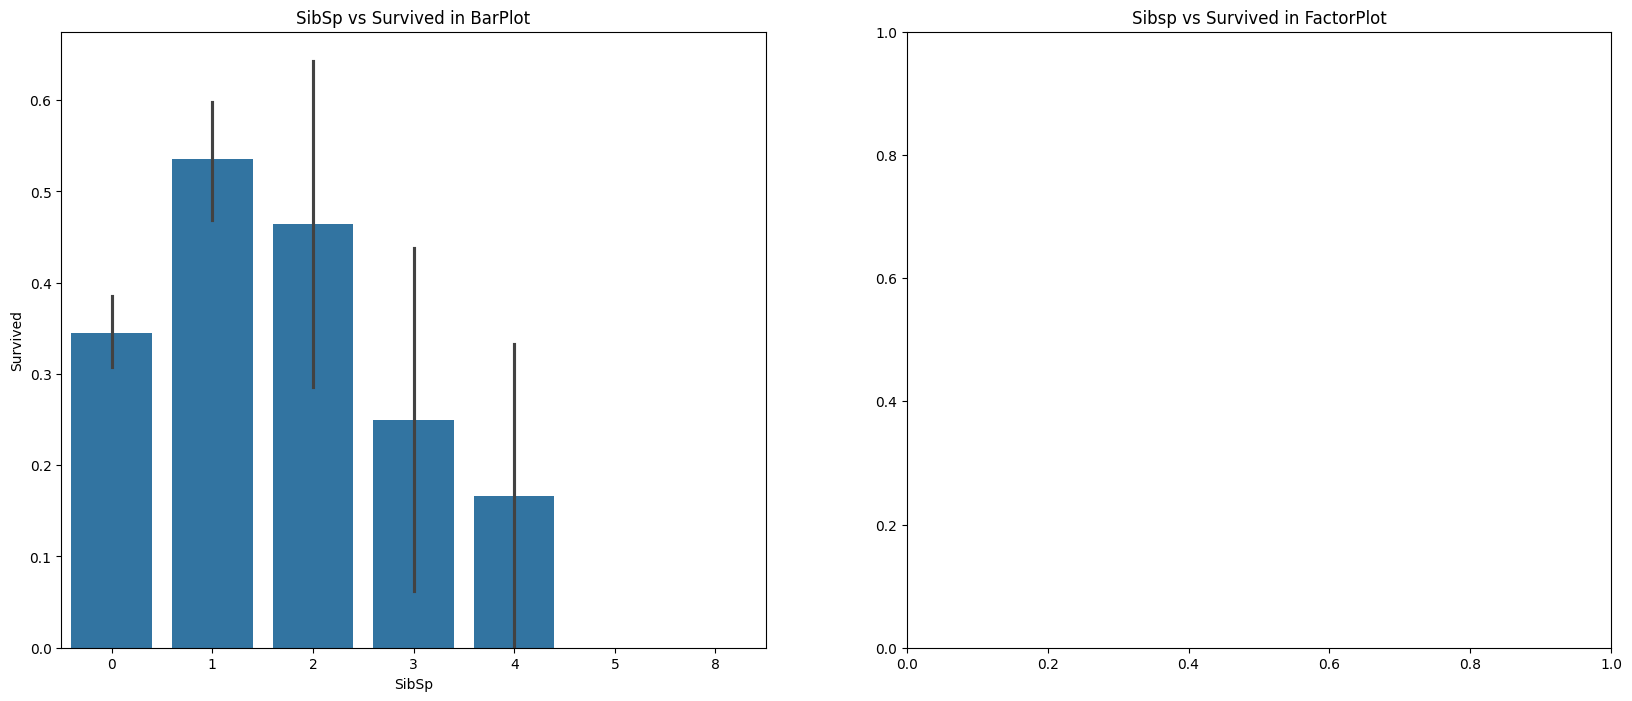

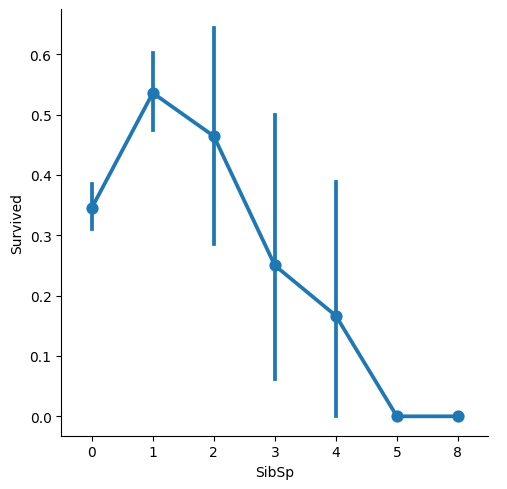

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=train_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived in BarPlot')
sns.catplot(x='SibSp',y='Survived',data=train_data,kind='point',ax=ax[1])
ax[1].set_title('Sibsp vs Survived in FactorPlot')
plt.show()